In [1]:
import os, sys
import subprocess
import json
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from coffea import processor, util, hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from boostedhiggs import VBFArrayProcessor

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [3]:
with open('xsec.json') as f:
    xs = json.load(f)
with open('pmap.json') as f:
    pmap = json.load(f)
with open('lumi.json') as f:
    lumis = json.load(f)

In [4]:
year="2017"
infiles = subprocess.getoutput("ls outfiles-array/"+year+"_dask_*.coffea").split()
outsum = processor.dict_accumulator()

In [5]:
infiles

['outfiles-array/2017_dask_GluGluHToBB.coffea',
 'outfiles-array/2017_dask_VBFHToBB.coffea']

In [6]:
df_dict = {}

for filename in infiles:
    print("Loading "+filename)

    if os.path.isfile(filename):
        out = util.load(filename)
        
        for k in out.keys():
            cols = list(out[k].keys())
            cols.remove('sumw')
            cols.remove('btagWeight')
            df = pd.DataFrame(columns=cols)
            for c in cols:
                df[c] = out[k][c].value
                
            if 'JetHT' not in k and 'SingleMuon' not in k:
                df['weight'] = df['weight'] * xs[k] * 1000 * lumis[year] / out[k]['sumw']

            df_dict[k] = df 


Loading outfiles-array/2017_dask_GluGluHToBB.coffea
Loading outfiles-array/2017_dask_VBFHToBB.coffea


QCD
QCDHT
ttbar
ttbarBoosted
singlet
Wjets
Zjets
ZjetsHT
VV
VVNLO
EWKZ
EWKW
ggF
VBFDipoleRecoilOff
VBF
WH
ZH
ttH
data
muondata


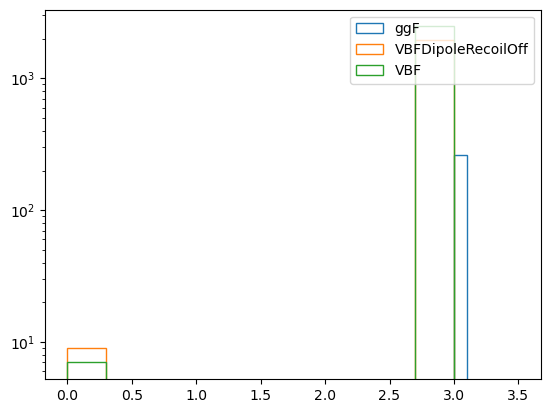

In [16]:
dfs = {}

for k in pmap.keys():
    print(k)
    
    processes = [df_dict[p] for p in pmap[k] if p in df_dict.keys()]
    if len(processes) == 0:
        continue
        
    dfs[k] = pd.concat(processes)
    
    plt.hist(dfs[k]['genflavor'],histtype='step',label=k)
    
    
plt.yscale('log')
plt.legend()

In [20]:
for p in ['ggF','VBF']:
    print(np.sum(dfs[p][dfs[p]['ddb']<0.64]['weight']),np.sum(dfs[p][dfs[p]['ddb']>0.64]['weight']))


3.478713324760603 1.3851544636667712
10.72188485292889 5.627823866266263


In [9]:
out['DYJetsToLL_Pt-50To100']


KeyError: 'DYJetsToLL_Pt-50To100'